<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       148 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       148 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset Info:
 None

Shape: (150, 5)

Columns: Index(['SL', 'SW', 'PL', 'PW', 'Species'], dtype='object')

Total elements: 750

Data types:
 SL         float64
SW         float64
PL         float64
PW         float64
Species     object
dtype: object

First 5 rows:
               0       1       2       3       4
SL          5.1     4.9     4.7     4.6     5.0
SW          3.5     3.0     3.2     3.1     3.6
PL          1.4     1.4     1.3     1.5     1.4
PW          0.2     0.2     0.2     0.2     0.2
Species  Setosa  Setosa  Setosa  Setosa  Setosa

Last 5 rows:
          

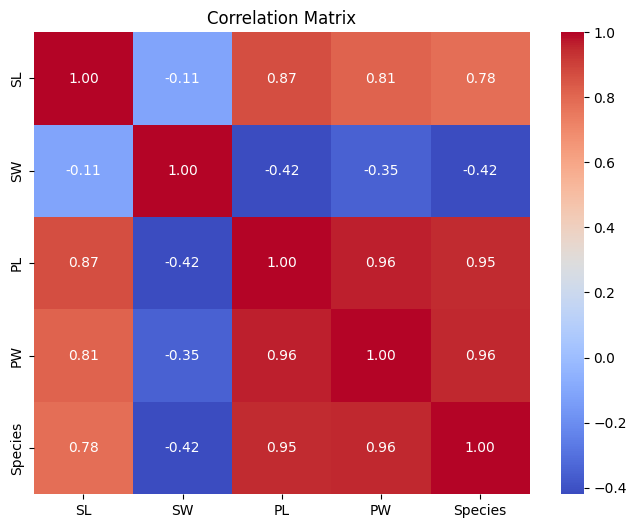


Model Performance Before Outlier Removal:


ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1]:
# Assignment 6:
# - Load the Iris dataset
# - Display basic and statistical information
# - Handle null values
# - Feature Engineering using correlation matrix
# - Build a Gaussian Naive Bayes classification model
# - Remove outliers and re-evaluate model performance

#---------------------------------------------------------------------------------------
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------------------------------------
# Function to remove outliers using IQR method
def RemoveOutlier(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3 + 1.5 * IQR, Q1 - 1.5 * IQR

    print(f"Highest allowed in variable {var}:", high)
    print(f"Lowest allowed in variable {var}:", low)

    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print(f'Total outliers in {var}: {count}')

    # Filter the dataframe
    df = df[(df[var] >= low) & (df[var] <= high)]
    return df
#---------------------------------------------------------------------------------------
# Function to build, train and evaluate the Gaussian Naive Bayes model
def BuildModel(X, Y):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import confusion_matrix, classification_report

    # Splitting the dataset into train and test (75% train, 25% test)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

    # Model training
    model = GaussianNB()
    model.fit(xtrain, ytrain)

    # Prediction and evaluation
    ypred = model.predict(xtest)

    # Confusion Matrix
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(ytest, ypred))
#---------------------------------------------------------------------------------------
# Load the dataset
df = pd.read_csv('iris.csv')

# Drop the 'Id' column and rename for simplicity
df = df.drop('Id', axis=1)
df.columns = ['SL', 'SW', 'PL', 'PW', 'Species']  # SL: Sepal Length, SW: Sepal Width, etc.

# Display basic info
print('Dataset Info:\n', df.info())
print('\nShape:', df.shape)
print('\nColumns:', df.columns)
print('\nTotal elements:', df.size)
print('\nData types:\n', df.dtypes)
print('\nFirst 5 rows:\n', df.head().T)
print('\nLast 5 rows:\n', df.tail().T)
print('\nRandom 5 rows:\n', df.sample(5).T)
#---------------------------------------------------------------------------------------
# Statistical Summary
print('\nDescriptive Statistics:\n', df.describe())
#---------------------------------------------------------------------------------------
# Check for missing values
print('\nNull Values in Dataset:\n', df.isna().sum())
#---------------------------------------------------------------------------------------
# Label Encoding the categorical target variable
df['Species'] = df['Species'].astype('category').cat.codes

# Display correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
#---------------------------------------------------------------------------------------
# Define features (X) and target (Y)
X = df[['SL', 'SW', 'PL', 'PW']]
Y = df['Species']

# Build and evaluate the model
print("\nModel Performance Before Outlier Removal:")
BuildModel(X, Y)
#---------------------------------------------------------------------------------------
# Visualize outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df, x='SL', ax=axes[0, 0])
sns.boxplot(data=df, x='SW', ax=axes[0, 1])
sns.boxplot(data=df, x='PL', ax=axes[1, 0])
sns.boxplot(data=df, x='PW', ax=axes[1, 1])
fig.tight_layout()
plt.show()
#---------------------------------------------------------------------------------------
# Remove outliers from 'SW' only (others are normally distributed)
df = RemoveOutlier(df, 'SW')

# Re-define features and target
X = df[['SL', 'SW', 'PL', 'PW']]
Y = df['Species']

# Rebuild and evaluate the model after outlier removal
print("\nModel Performance After Outlier Removal:")
BuildModel(X, Y)

# Note: Accuracy might reduce slightly due to overfitting or information loss after outlier removal



--- Dataset Info ---
Shape: (150, 5)
Columns: ['SL', 'SW', 'PL', 'PW', 'Species']
Total elements: 750
Data types:
 SL         float64
SW         float64
PL         float64
PW         float64
Species     object
dtype: object

First 5 rows:
     SL   SW   PL   PW Species
0  5.1  3.5  1.4  0.2  Setosa
1  4.9  3.0  1.4  0.2  Setosa
2  4.7  3.2  1.3  0.2  Setosa
3  4.6  3.1  1.5  0.2  Setosa
4  5.0  3.6  1.4  0.2  Setosa

Last 5 rows:
       SL   SW   PL   PW    Species
145  6.7  3.0  5.2  2.3  Virginica
146  6.3  2.5  5.0  1.9  Virginica
147  6.5  3.0  5.2  2.0  Virginica
148  6.2  3.4  5.4  2.3  Virginica
149  5.9  3.0  5.1  1.8  Virginica

Random 5 rows:
       SL   SW   PL   PW     Species
43   5.0  3.5  1.6  0.6      Setosa
90   5.5  2.6  4.4  1.2  Versicolor
3    4.6  3.1  1.5  0.2      Setosa
138  6.0  3.0  4.8  1.8   Virginica
6    4.6  3.4  1.4  0.3      Setosa

--- Statistical Summary ---
               SL          SW          PL          PW
count  148.000000  150.000000  150.000

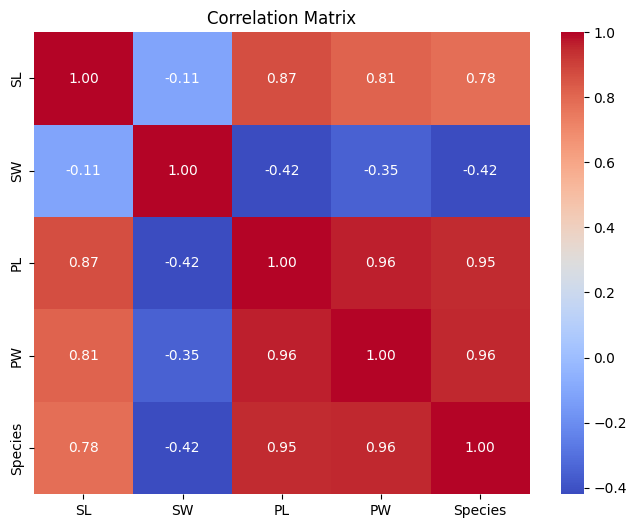


--- Model Before Removing Outliers ---


ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [4]:
# Assignment number 6:
# Goal: Load the Iris dataset, perform basic EDA, handle nulls and outliers,
# and build a Gaussian Naive Bayes model to classify iris species.

#---------------------------------------------------------------------------------------
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------------------------------------------------------------------------
# Function to remove outliers from a given variable using the IQR method
def RemoveOutlier(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3 + 1.5 * IQR, Q1 - 1.5 * IQR

    print(f"Highest allowed in variable '{var}':", high)
    print(f"Lowest allowed in variable '{var}':", low)

    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print(f'Total outliers in "{var}":', count)

    df = df[(df[var] >= low) & (df[var] <= high)]
    return df

#---------------------------------------------------------------------------------------
# Function to build and evaluate Gaussian Naive Bayes model
def BuildModel(X, Y):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import confusion_matrix, classification_report

    # Splitting dataset into training (75%) and testing (25%)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

    # Initializing and training the model
    model = GaussianNB()
    model.fit(xtrain, ytrain)

    # Making predictions
    ypred = model.predict(xtest)

    # Plotting confusion matrix
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Display classification report
    print("Classification Report:\n")
    print(classification_report(ytest, ypred))

#---------------------------------------------------------------------------------------
# Loading the Iris dataset
df = pd.read_csv('iris.csv')
df = df.drop('Id', axis=1)  # Dropping unnecessary ID column
df.columns = ['SL', 'SW', 'PL', 'PW', 'Species']  # Renaming columns for simplicity

#---------------------------------------------------------------------------------------
# Basic dataset information
print('\n--- Dataset Info ---')
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Total elements:', df.size)
print('Data types:\n', df.dtypes)
print('\nFirst 5 rows:\n', df.head())
print('\nLast 5 rows:\n', df.tail())
print('\nRandom 5 rows:\n', df.sample(5))

#---------------------------------------------------------------------------------------
# Statistical summary
print('\n--- Statistical Summary ---')
print(df.describe())

#---------------------------------------------------------------------------------------
# Checking for null values
print('\n--- Null Value Check ---')
print(df.isnull().sum())

#---------------------------------------------------------------------------------------
# Label Encoding of Species column (for classification)
df['Species'] = df['Species'].astype('category').cat.codes

#---------------------------------------------------------------------------------------
# Displaying Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#---------------------------------------------------------------------------------------
# Selecting features and label for model training
X = df[['SL', 'SW', 'PL', 'PW']]  # Input features
Y = df['Species']                 # Target label

print('\n--- Model Before Removing Outliers ---')
BuildModel(X, Y)

#---------------------------------------------------------------------------------------
# Boxplot to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(10,6))
sns.boxplot(data=df, x='SL', ax=axes[0,0])
sns.boxplot(data=df, x='SW', ax=axes[0,1])
sns.boxplot(data=df, x='PL', ax=axes[1,0])
sns.boxplot(data=df, x='PW', ax=axes[1,1])
fig.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------
# Removing outliers from selected features (only SW here)
df = RemoveOutlier(df, 'SW').reset_index(drop=True)

# Re-selecting input and output after cleaning
X = df[['SL', 'SW', 'PL', 'PW']]
Y = df['Species']

print('\n--- Model After Removing Outliers ---')
BuildModel(X, Y)

# Note: Sometimes removing outliers can reduce performance if too many useful data points are lost.


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dutta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dutta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dutta\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dutta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True